# Analysis of the DeePyMoD Output for Van der Pol

In [1]:
# imports
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import os
import seaborn as sns
import re
import matplotlib.gridspec as gridspec
import math

In [2]:
# load folder directory of batch
# batch = "batch_10-17_VanderPol"
# out_dir = f"C:/Users/Maria/Documents/Masterstudium/Masterarbeit/deepmod_output/output_LRZ_Cluster/{batch}/"
out_dir = f"C:/Users/Maria/Documents/Masterstudium/Masterarbeit/deepmod_output/output_LRZ_Cluster_10-27_structured/VanderPol/noise/"

# run_specifications
n_taxa = 2

# list files in batch run
os.listdir(out_dir)

plot_output = "C:/Users/Maria/Documents/Masterstudium/Masterarbeit/Plots/"

# store standard matplotlib colors
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Summary of approximation plots

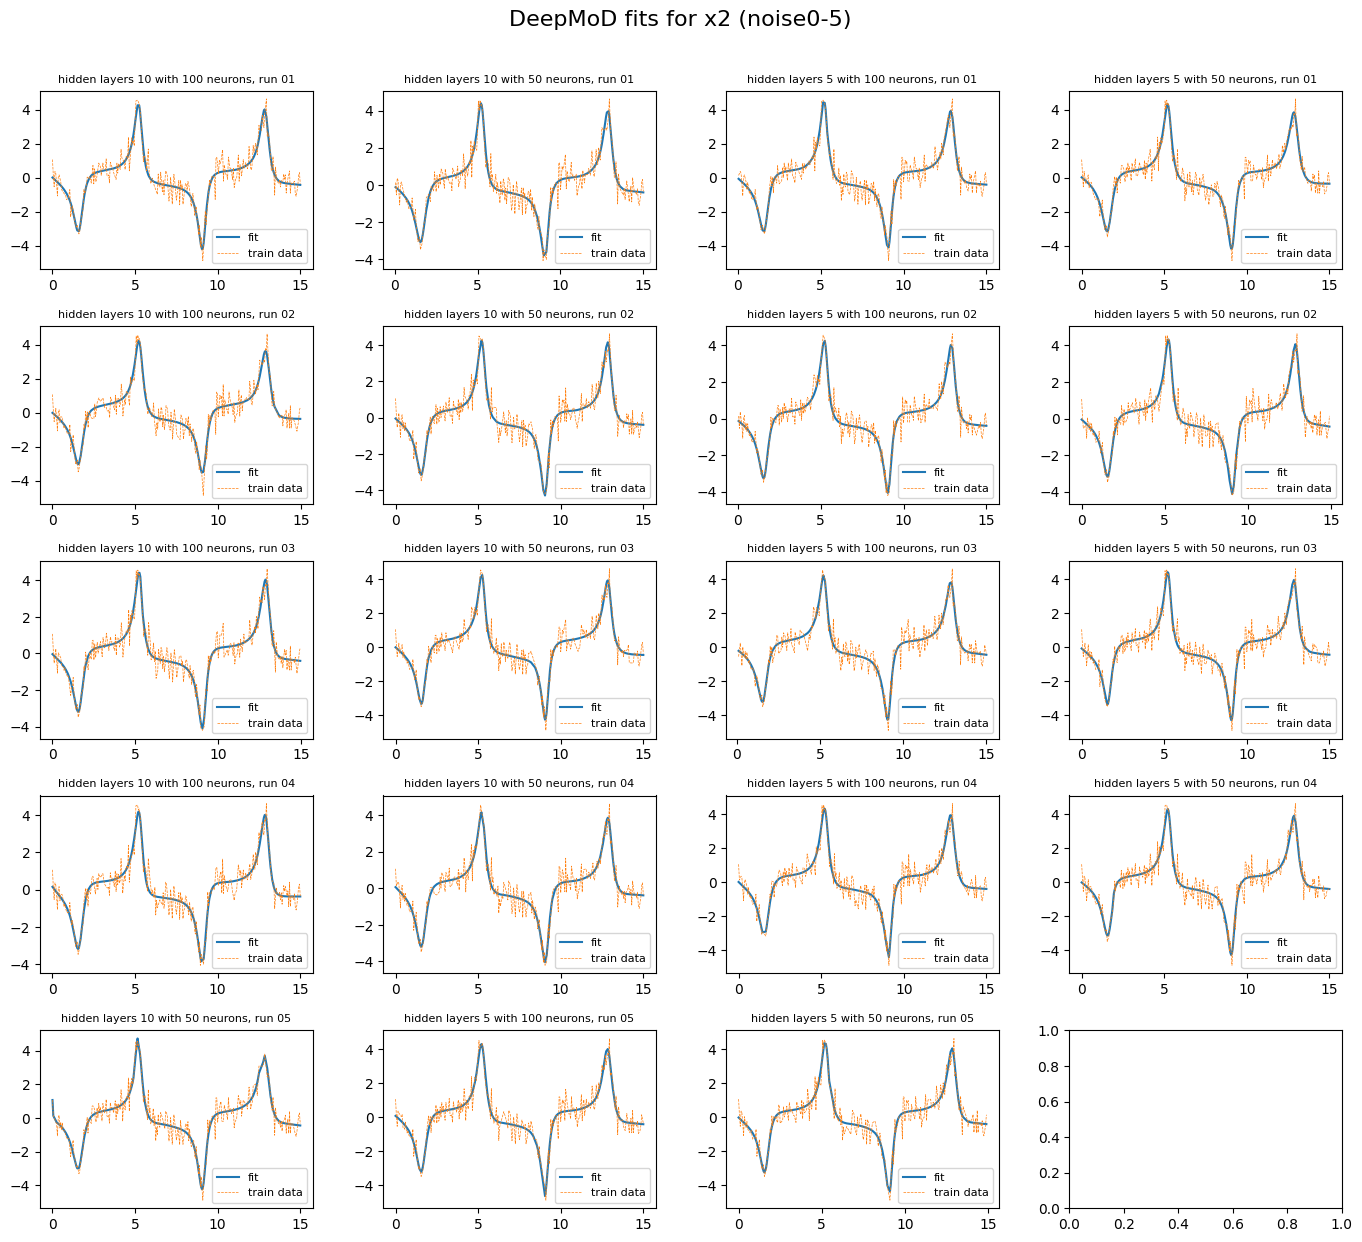

In [3]:
# for taxon in np.arange(1, n_taxa + 1):
taxon = 2
for spec in ["noise0-5"]: # "int5", "th0-01"
    # spec = "only-fitting" # "int2" "only-fitting" --> set to "" to get all outputs of the folder
    runs = []
    for file in [s for s in os.listdir(out_dir) if spec in s and "." not in s]:
        m = re.search('run(.+?)_', file)
        if m:
            runs.append(file)
    # specify dimensions of the plot
    n_runs = len(runs)

    if(n_runs > 0):
        # n_runs = len(os.listdir(out_dir))
        # set plot dimensions
        n_col = min(math.ceil(n_runs/2), 4) # 4 rows, except count is <= 4
        n_row = math.ceil((n_runs)/n_col)

        # make plot
        fig, axs = plt.subplots(n_row, n_col)
        fig.set_figwidth(3.5*n_col)
        fig.set_figheight(2.5*n_row)
        fig.suptitle(f"DeepMoD fits for x{taxon} ({spec})",
                    size=16, y=1.0)
        fig.tight_layout(pad=2.0)  
        
        overall_min = 0
        overall_max = 0

        y = 0

        for run in runs:
            plot_path_tmp = f"{out_dir}{run}/Data/"
            if os.path.exists(f"{plot_path_tmp}/prediction_x{taxon}.csv"):
                # read data files
                df_pred = pd.read_csv(f"{plot_path_tmp}prediction_x{taxon}.csv", header=[0])
                df_data_train = pd.read_csv(f"{plot_path_tmp}data_train_x{taxon}.csv", header=[0])
                # convert files to numpy array
                data_train = np.array(df_data_train)
                pred = np.array(df_pred)
                # make plot
                axs[int(y/n_col), (y % n_col)].plot(pred[:,1], pred[:,0], label = "fit")
                axs[int(y/n_col), (y % n_col)].plot(data_train[:,1], data_train[:,0], label = "train data",  linewidth=0.5, linestyle = '--', color = colors[1])
                # axs[int(y/n_col), (y % n_col)].scatter(data_train[:,1], data_train[:,0], label = "data", s = 1, color = colors[1])
                axs[int(y/n_col), (y % n_col)].legend(fontsize="8")
                hl = re.search(r"_(\d{1,2})_(\d{2,3})", run)
                run_nr = re.search(r"run(\d{1,2})", run)
                axs[int(y/n_col), (y % n_col)].set_title(f"hidden layers {hl.group(1)} with {hl.group(2)} neurons, run {run_nr.group(1)}", size = 8)
                y += 1

        # save plots in one file
        # plt.savefig(f'{out_dir}/approximations_{spec}_x{taxon}.pdf',
        #             bbox_inches='tight', dpi = 300)
        # plt.close()
        # plt.show()

## Heatmpas of Coefficients

### Create one summary plot that contains all estimated model coefficients for all runs for one specification

The following code helps to summarize the output files over several runs.
It counts in multiple estimated coefficients outputs the library values that are not zero or even greater than 1e-5.

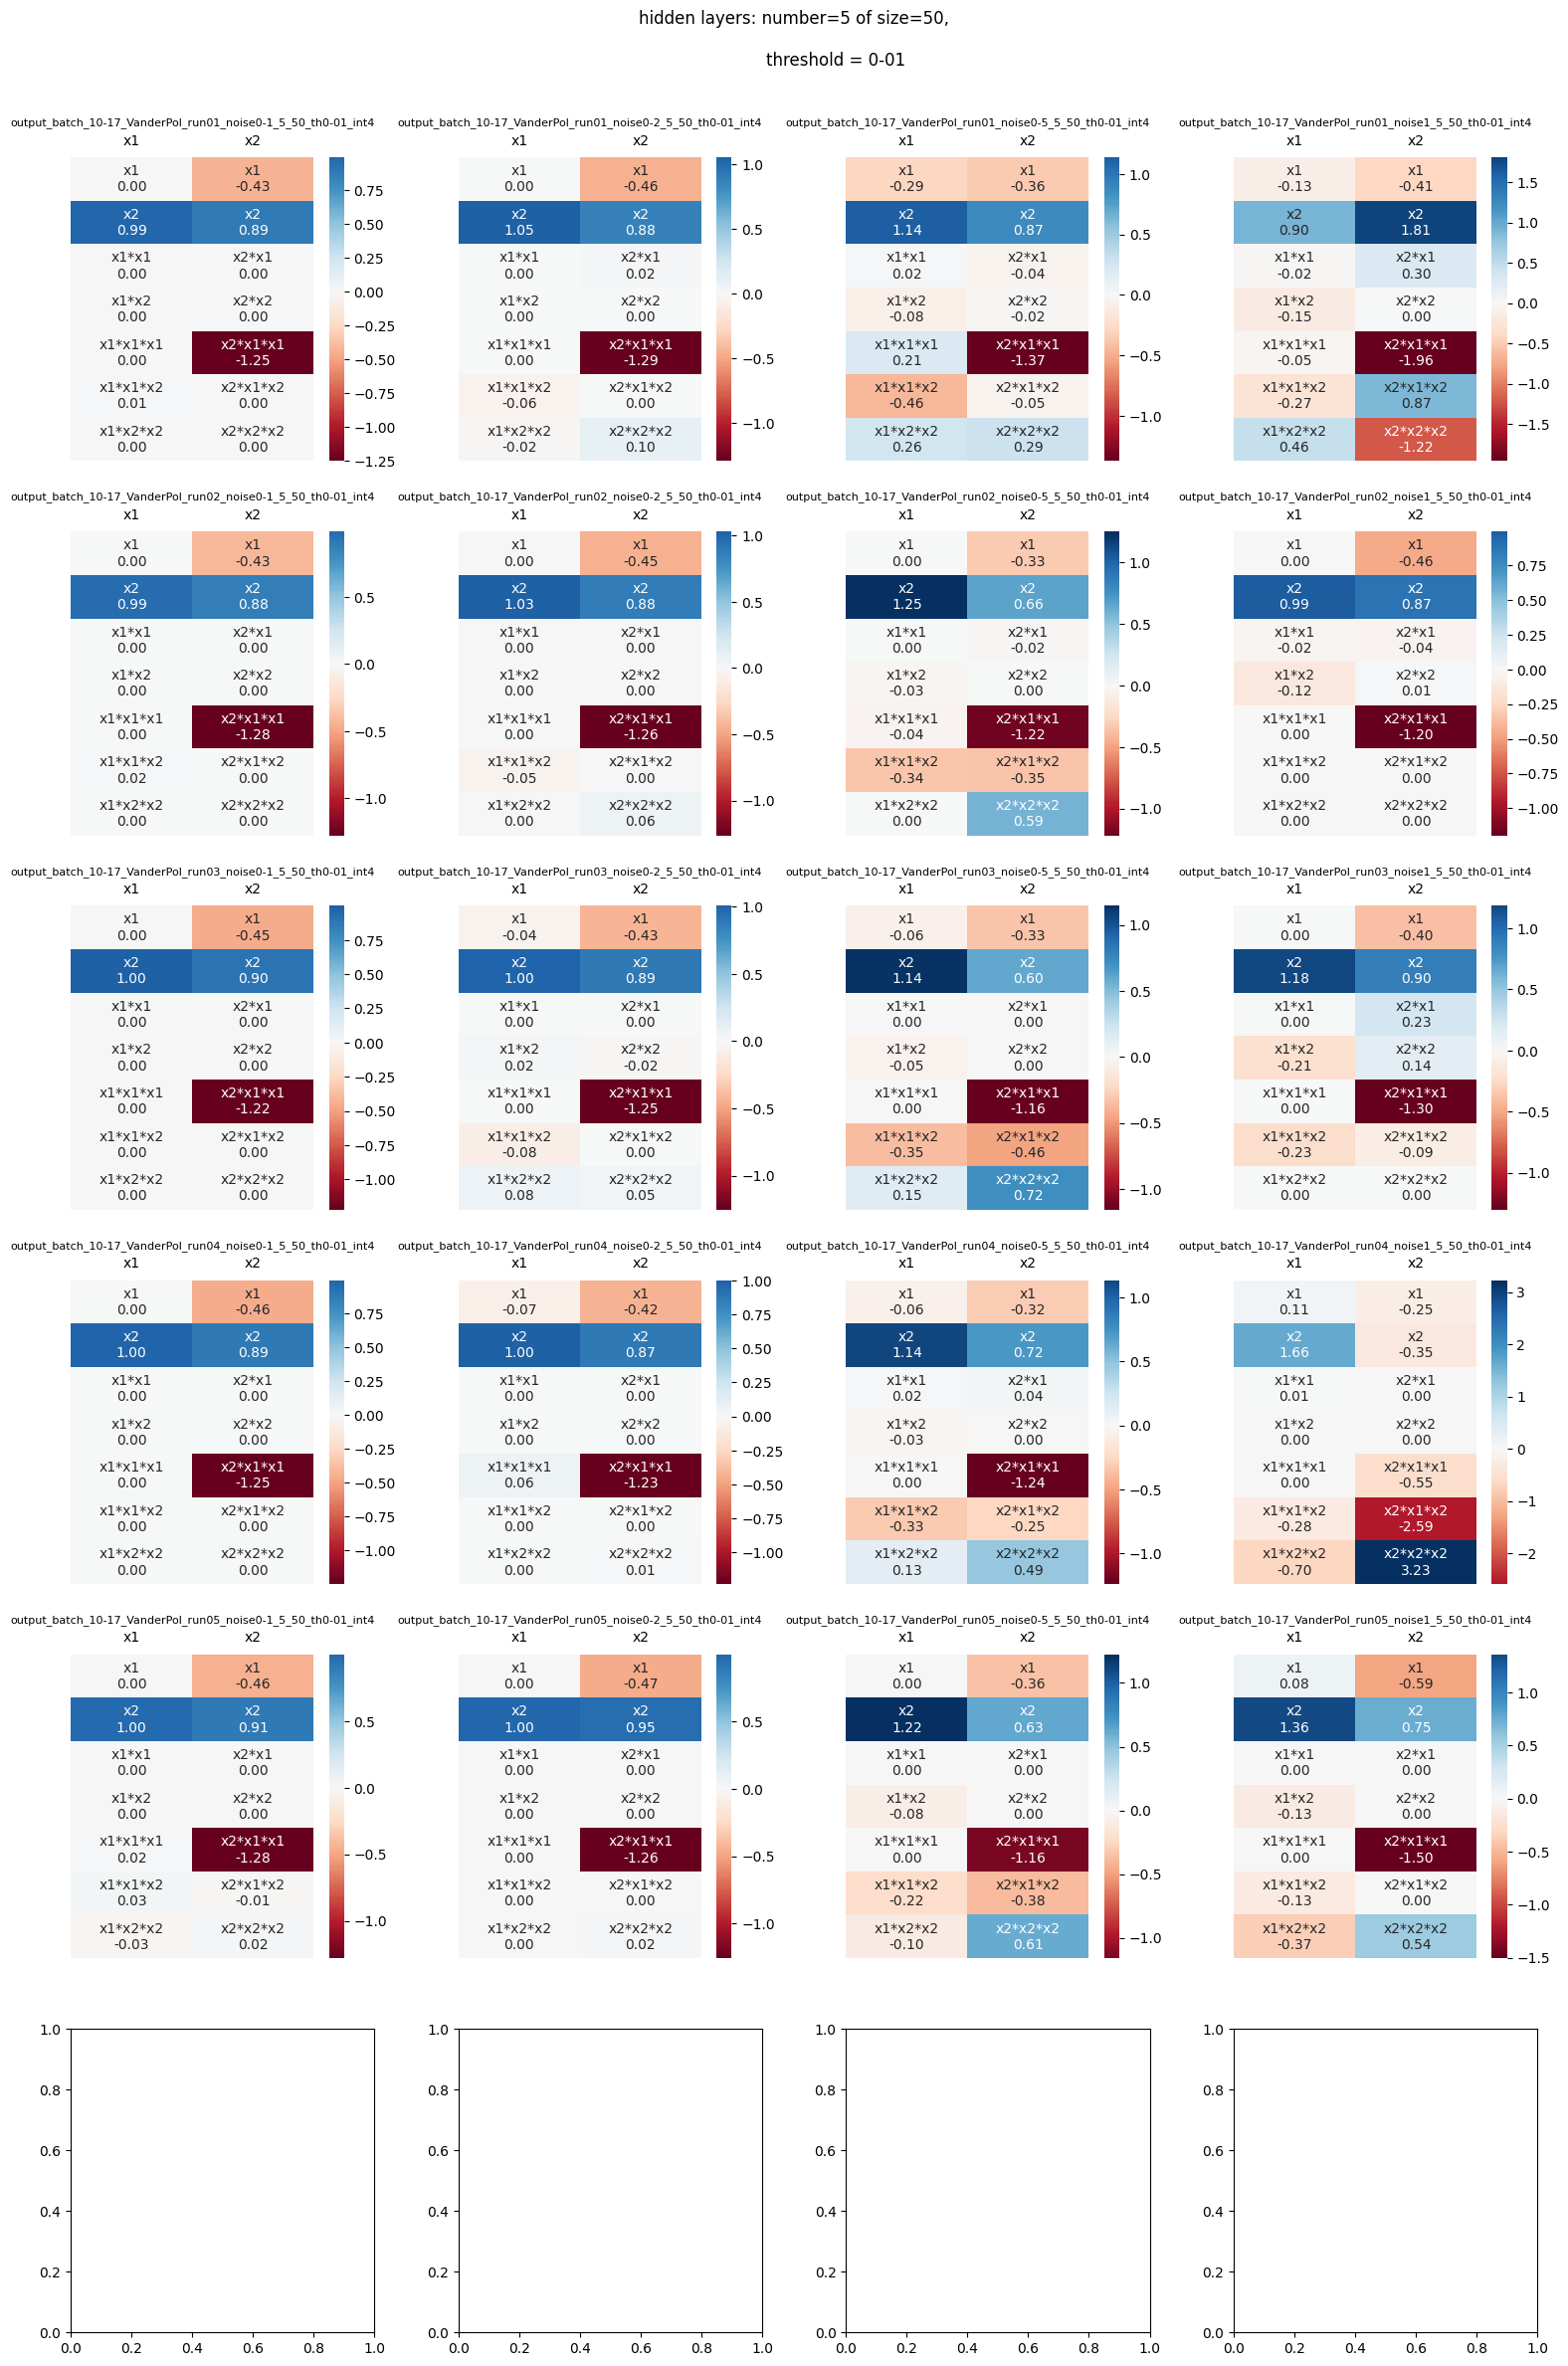

In [4]:
hl_number = 5
hl_size = 50
th = "0-01"
int_order = "4"

spec = f'_{hl_number}_{hl_size}_th{th}_int{int_order}'
# get list of available runs for the given setting
runs = []
for file in [s for s in os.listdir(out_dir) if spec in s]:
    m = re.search('run(.+?)_', file)
    if m:
        runs.append(file)

# specify dimensions of the plot
n_runs = len(runs)
# check if runs for these specifications are available
if n_runs > 0:
    # specify dimensions of the plot
    n_row = int(n_runs/4) + 1
    n_col = 4

    # make plot
    fig, axs = plt.subplots(n_row, n_col)
    fig.set_figwidth(4*n_col)
    fig.set_figheight(4*n_row)
    fig.suptitle(f"""hidden layers: number={hl_number} of size={hl_size},\n
                threshold = {th}""", y=1.0)
    fig.tight_layout(pad=3.0)
    for i, run in enumerate(runs):
        out_tmp = f"{out_dir}{run}/Data/"
        if os.path.exists(f"{out_tmp}model_estimated_coeffs.csv"):
            # read data files
            df_model_coeffs_tmp = pd.read_csv(f"{out_tmp}model_estimated_coeffs.csv", header=[0], index_col=[0])
            df_library_tmp = pd.read_csv(f"{out_tmp}model_library_values.csv", header=[0], index_col=[0])

            # define labels
            results = np.asarray(df_model_coeffs_tmp)
            strings = np.asarray(df_library_tmp)
            labels = (np.asarray(["{0}\n{1:.2f}".format(string, value)
                                for string, value in zip(strings.flatten(),
                                                        results.flatten())])
                    ).reshape(df_library_tmp.shape[0], n_taxa)
            
            # make heatmap
            sns.heatmap(df_model_coeffs_tmp, annot=labels, fmt="", cmap="RdBu", center=0, ax=axs[int(i/n_col), i%n_col],
                         yticklabels=False)
            # sns.heatmap(df_model_coeffs_tmp, cmap="RdBu", center=0, annot=True, ax=axs[int(run/n_col), run%n_col])
            axs[int(i/n_col), i%n_col].xaxis.tick_top()
            axs[int(i/n_col), i%n_col].tick_params(top=False) # left=False, 
            axs[int(i/n_col), i%n_col].set_title(run, fontsize = 8)
    plt.yticks(rotation=0)
    plt.show()

### Create one plot per specification that counts how often a library value was not 0

In [5]:
for hl_number in [5, 10, 50]: #[20, 50]:
    for hl_size in [50, 100]: #, 80, 100
        for th in ["No", "0-01"]: # "0_1", "0_01",
            int_order = 4
            spec = f'_{hl_number}_{hl_size}_th{th}_int{int_order}'
            # get list of available runs for the given setting
            runs = []
            for file in [s for s in os.listdir(out_dir) if spec in s]:
                m = re.search('run(.+?)_', file)
                if m:
                    runs.append(m.group(1))
            
            # specify dimensions of the plot
            n_runs = len(runs)
            # check if runs for these specifications are available
            if n_runs > 0:
                # create zero dataframe of the shape of the output
                file = os.listdir(out_dir)[0]
                out_tmp = f"{out_dir}output_{batch}_run{runs[0]}{spec}/Data/"
                df_sparsity_mask_all = pd.read_csv(f"{out_tmp}model_estimated_coeffs.csv", header=[0], index_col=[0])
                df_sparsity_mask_all.iloc[:] = 0
                count = 0
                for run in runs:
                    out_tmp = f"{out_dir}output_{batch}_run{run}{spec}/Data/"
                    if os.path.exists(out_tmp):
                        df_model_coeffs_tmp = pd.read_csv(f"{out_tmp}model_estimated_coeffs.csv", header=[0], index_col=[0])
                        df_sparsity_mask_tmp = (abs(df_model_coeffs_tmp) > 0.1).astype(int)
                        df_sparsity_mask_all = df_sparsity_mask_tmp.add(df_sparsity_mask_all)
                        count += 1

                df_sparsity_mask_all = df_sparsity_mask_all/count

                # read library values
                df_library_tmp = pd.read_csv(f"{out_tmp}model_library_values.csv", header=[0], index_col=[0])

                # define labels
                results = np.asarray(df_sparsity_mask_all)
                strings = np.asarray(df_library_tmp)
                labels = (np.asarray(["{0}\n{1:.0f}%".format(string, value*100)
                                    for string, value in zip(strings.flatten(),
                                                            results.flatten())])
                        ).reshape(df_library_tmp.shape[0], n_taxa)
                
                # heatmap
                ax = sns.heatmap(df_sparsity_mask_all, cmap="YlOrBr", vmin=0, vmax=1, annot=labels, fmt="", yticklabels=False)
                ax.xaxis.tick_top()
                ax.tick_params(left=False, top=False)
                ax.set_title(f"""{batch}_{hl_number}_{hl_size}_th{th}\n
                            number of available files: {count}""")
                plt.yticks(rotation=0)
                plt.show()

NameError: name 'batch' is not defined

### Calculate mean values over all runs for each library coefficient

In [6]:
for hl_number in [5, 10, 50]:
    for hl_size in [50, 100]:
        for th in ["No", "0-01"]:
            int_order = 4
            spec = f'_{hl_number}_{hl_size}_th{th}_int{int_order}'
            # get list of available runs for the given setting
            runs = []
            for file in [s for s in os.listdir(out_dir) if spec in s]:
                m = re.search('run(.+?)_', file)
                if m:
                    runs.append(m.group(1))
            
            # specify dimensions of the plot
            n_runs = len(runs)
            # check if runs for these specifications are available
            if n_runs > 0:
                # create zero dataframe of the shape of the output
                file = os.listdir(out_dir)[0]
                out_tmp = f"{out_dir}output_{batch}_run{runs[0]}{spec}/Data/"
                df_sparsity_mask_all = pd.read_csv(f"{out_tmp}model_estimated_coeffs.csv", header=[0], index_col=[0])
                df_sparsity_mask_all.iloc[:] = 0
                count = 0
                for run in runs:
                    out_tmp = f"{out_dir}output_{batch}_run{run}{spec}/Data/"
                    if os.path.exists(out_tmp):
                        df_model_coeffs_tmp = pd.read_csv(f"{out_tmp}model_estimated_coeffs.csv", header=[0], index_col=[0])
                        df_sparsity_mask_all += df_model_coeffs_tmp
                        count += 1

                df_sparsity_mask_all = df_sparsity_mask_all/count

                # read library values
                df_library_tmp = pd.read_csv(f"{out_tmp}model_library_values.csv", header=[0], index_col=[0])

                # define labels
                results = np.asarray(df_sparsity_mask_all)
                strings = np.asarray(df_library_tmp)
                labels = (np.asarray(["{0}\n{1:.2f}".format(string, value)
                                    for string, value in zip(strings.flatten(),
                                                            results.flatten())])
                        ).reshape(df_library_tmp.shape[0], n_taxa)
                
                # heatmap
                ax = sns.heatmap(df_sparsity_mask_all, cmap="RdBu", center=0, annot=labels, fmt="", yticklabels=False)
                ax.xaxis.tick_top()
                ax.tick_params(left=False, top=False)
                ax.set_title(f"""{batch}_{hl_number}_{hl_size}_th{th}\n
                            number of available files: {count}""")
                plt.yticks(rotation=0)
                plt.show()

NameError: name 'batch' is not defined

In [ ]:
out_dir

'C:/Users/Maria/Documents/Masterstudium/Masterarbeit/deepmod_output/output_LRZ_Cluster/batch_10-17_VanderPol/'

# Plot boxplots of coefficients

## for the four noise levels

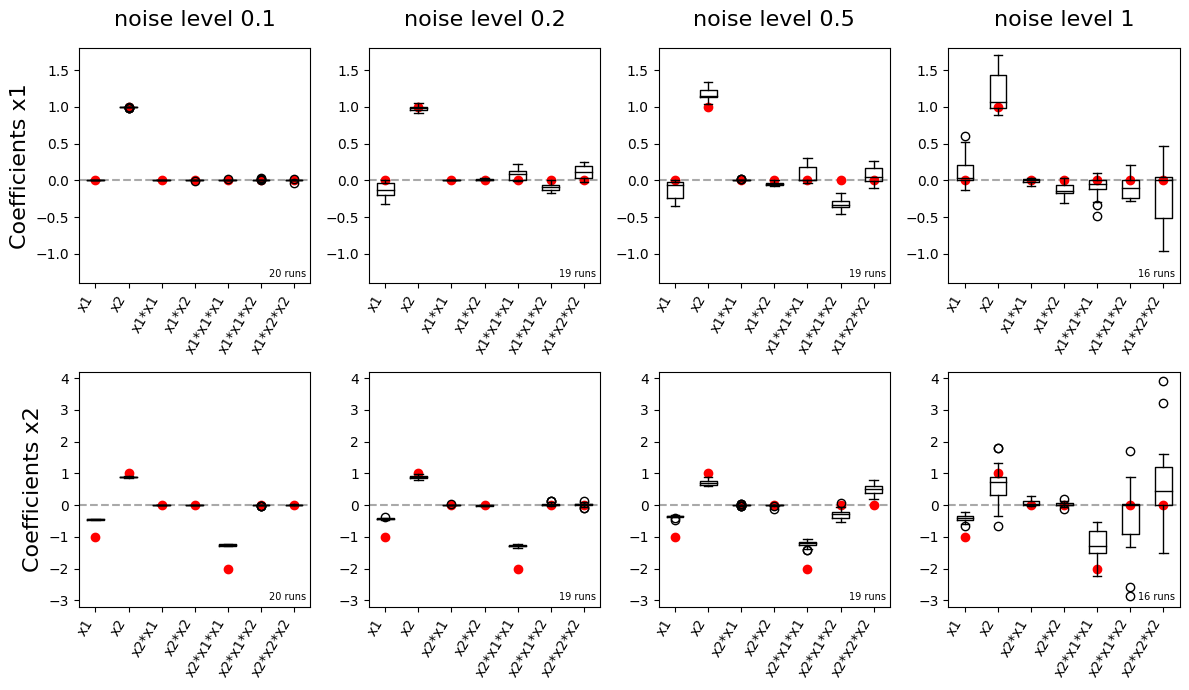

In [7]:
noises = ["0-1", "0-2", "0-5", "1"]

# Function to create a boxplot for a given axis
def create_boxplot(ax, data, x_labels, title, true_coeffs, y_limits):
    boxplot = ax.boxplot(data)
    ax.set_title(title, fontsize = 18, pad = 20)
    ax.set_xticklabels(x_labels, rotation=60, ha="right")
    for median in boxplot['medians']:
        median.set_color('k')
    ax.plot(range(1, len(true_coeffs)+1), true_coeffs, 'ro', zorder=-2) # add true coeffs as red dots
    ax.axhline(y=0, color='#A9A9A9', linestyle='--', zorder=-3) # add horizontal line in 0
    ax.set_ylim(y_limits)

# Function to generate boxplots for a specific noise level
def generate_boxplots(noise):
    spec = f'noise{noise}'
    runs = [s for s in os.listdir(out_dir) if spec in s and "." not in s]

    if not runs:
        print(f"No runs found for {noise}.")
        return None

    list_coeffs_all = [pd.read_csv(f"{out_dir}{run}/Data/model_estimated_coeffs.csv", header=[0], index_col=[0]).to_numpy() for run in runs]
    df_library_tmp = pd.read_csv(f"{out_dir}{runs[-1]}/Data/model_library_values.csv", header=[0], index_col=[0])
    library_x1, library_x2 = df_library_tmp["x1"], df_library_tmp["x2"]

    coeffs_x1, coeffs_x2 = [[] for _ in range(list_coeffs_all[0].shape[0])], [[] for _ in range(list_coeffs_all[0].shape[0])]
    for arr in list_coeffs_all:
        for i in range(arr.shape[0]):
            coeffs_x1[i].append(arr[i, 0])
            coeffs_x2[i].append(arr[i, 1])

    n_runs = len(runs)

    return coeffs_x1, coeffs_x2, library_x1, library_x2, n_runs

# Create the plots
fig, axs = plt.subplots(nrows=2, ncols=len(noises), figsize=(3 * len(noises), 7))
true_coeffs_x1 = [0, 1, 0, 0, 0, 0, 0]
true_coeffs_x2 = [-1, 1, 0, 0, -2, 0, 0]

y_limits_row_1 = [-1.4, 1.8]  
y_limits_row_2 = [-3.2, 4.2]  

for i, noise in enumerate(noises):
    result = generate_boxplots(noise)
    if result:
        coeffs_x1, coeffs_x2, library_x1, library_x2, n = result
        create_boxplot(axs[0, i], coeffs_x1, library_x1, "", true_coeffs_x1, y_limits_row_1)
        create_boxplot(axs[1, i], coeffs_x2, library_x2, "", true_coeffs_x2, y_limits_row_2)
        axs[0, i].text(0.98, 0.02, f'{n} runs', ha='right', va='bottom', fontsize = 7, transform=axs[0, i].transAxes)
        axs[1, i].text(0.98, 0.02, f'{n} runs', ha='right', va='bottom', fontsize = 7, transform=axs[1, i].transAxes)

# set row titles
axs[0, 0].set_ylabel("Coefficients x1", fontsize = 16)
axs[1, 0].set_ylabel("Coefficients x2", fontsize = 16)

# set column titles
axs[0, 0].set_title(f'noise level {noises[0].replace("-", ".")}', fontsize = 16, pad = 16)
axs[0, 1].set_title(f'noise level {noises[1].replace("-", ".")}', fontsize = 16, pad = 16)
axs[0, 2].set_title(f'noise level {noises[2].replace("-", ".")}', fontsize = 16, pad = 16)
axs[0, 3].set_title(f'noise level {noises[3].replace("-", ".")}', fontsize = 16, pad = 16)

plt.tight_layout()

plt.savefig(f'{plot_output}/VdP_coeff_barplots.pdf', 
            bbox_inches='tight', dpi = 300)
# plt.cloes()
# plt.show()

## Plot coefficients of library for x_1

In [ ]:
list_values_x1 = []
for additional_name in ["noise0-1", "noise0-2", "noise0-5", "noise1"]:
    list_tmp = []
    int_order = 4

    # get list of available runs for the given setting
    runs = []
    for file in [s for s in os.listdir(out_dir) if additional_name in s and f'_int{int_order}' in s and ".pdf" not in s]:
        runs.append(file)
    # print(runs)
    n_runs = len(runs)

    # check if runs for these specifications are available
    if n_runs > 0:
        out_tmp = f"{out_dir}{runs[0]}/Data/"
        df_model_coeffs_tmp = pd.read_csv(f"{out_tmp}model_estimated_coeffs.csv", header=[0], index_col=[0])
        df_model_coeff_all_x1 = df_model_coeffs_tmp.drop(columns=["x2"]).rename(columns={"x1": f'x1_run{runs[0]}'})
        if n_runs > 2:
            for run in runs[1:]:
                out_tmp = f"{out_dir}{run}/Data/"
                if os.path.exists(out_tmp):
                    df_model_coeffs_tmp = pd.read_csv(f"{out_tmp}model_estimated_coeffs.csv", header=[0], index_col=[0]).rename(columns={"x1": f'x1_run{run}'})
                    df_model_coeff_all_x1 = df_model_coeff_all_x1.join(df_model_coeffs_tmp.drop(columns=["x2"]))

        df = df_model_coeff_all_x1.transpose()
        # print(df)

        # read library values
        df_library_tmp = pd.read_csv(f"{out_tmp}model_library_values.csv", header=[0], index_col=[0])
        library_x1 = df_library_tmp["x1"]

        # print(df.values)

        list_tmp.append(df.values)

    list_values_x1.extend(list_tmp)

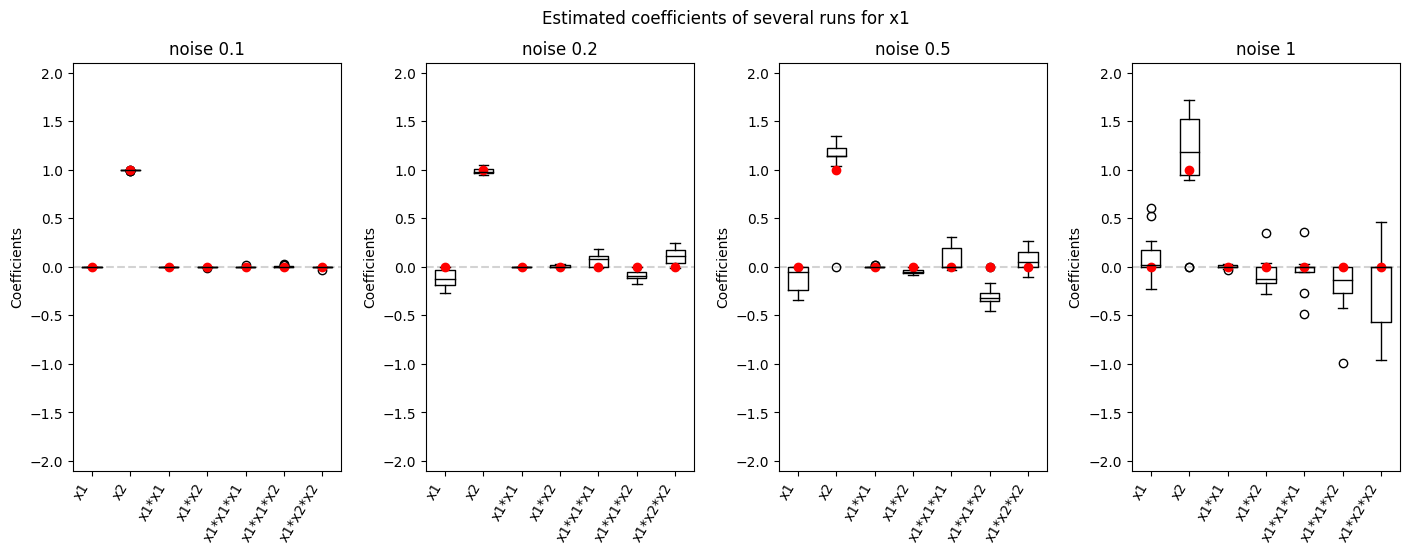

In [ ]:
# make plot
n_col = 4
n_row = 1

fig, axs = plt.subplots(n_row, n_col)
fig.set_figwidth(3.5*n_col)
fig.set_figheight(5*n_row)
fig.suptitle(f"Estimated coefficients of several runs for x1", y=1.0)
fig.tight_layout(w_pad=3.0, h_pad=1)
for i, noise_level in enumerate(["noise 0.1", "noise 0.2", "noise 0.5", "noise 1"]):

    # Create a boxplot with confidence intervals for each row
    boxplot = axs[i].boxplot(list_values_x1[i])

    # Add labels
    axs[i].set_ylabel("Coefficients")
    axs[i].set_title(noise_level)

    # Compute the maximum absolute value in your data or specific values
    # max_value = max(np.max(np.abs(df.values)), 2) + 0.1
    # axs[i].set_ylim(-max_value, max_value)
    axs[i].set_ylim(-2.1, 2.1)

    axs[i].set_xticklabels(library_x1, rotation=60, ha="right")

    # Change the color of median line to black
    for median in boxplot['medians']:
        median.set_color('k')

    # add ground trouth as red dots
    true_coeffs = [0, 1, 0, 0, 0, 0, 0] 
    x_positions = range(1, len(true_coeffs)+1)
    axs[i].plot(x_positions, true_coeffs, 'ro')

    # Add a horizontal line through y=0
    axs[i].axhline(y=0, color='lightgrey', linestyle='--', zorder=-3)

plt.savefig(f'{plot_output}VdP_coeff_barplot_x1.pdf', bbox_inches='tight', dpi = 300)

## Barplots coefficients by run specification (x2)

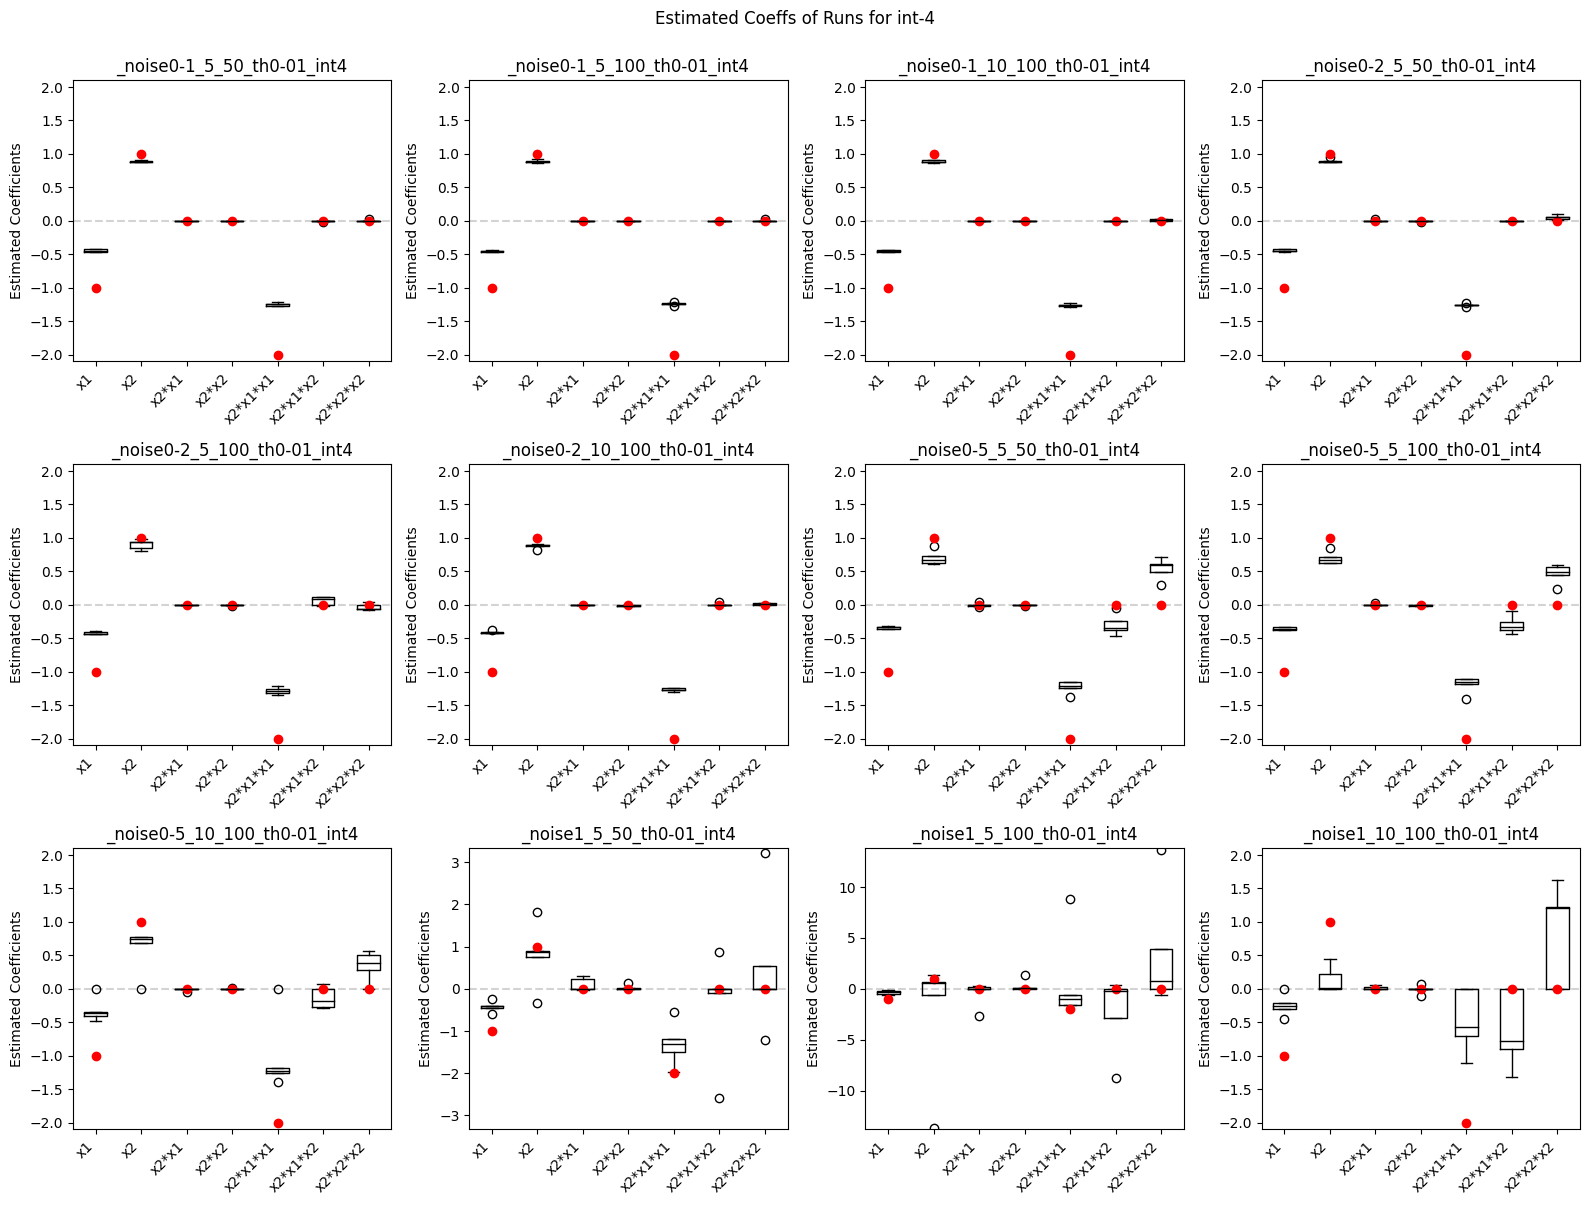

In [ ]:
n_col = 4
n_row = 3

int_order = 4

# make plot
fig, axs = plt.subplots(n_row, n_col)
fig.set_figwidth(4*n_col)
fig.set_figheight(4*n_row)
fig.suptitle(f"Estimated Coeffs of Runs for int-{int_order}", y=1.0)
fig.tight_layout(pad=4.0)
y = 0

for additional_name in ["noise0-1", "noise0-2", "noise0-5", "noise1"]:
    for hl_number in [5, 10, 50]:
        for hl_size in [50, 100, 200]:
            for th in ["No", "0-01"]:
                spec = f'_{additional_name}_{hl_number}_{hl_size}_th{th}_int{int_order}'
                # get list of available runs for the given setting
                runs = []
                for file in [s for s in os.listdir(out_dir) if spec in s]:
                    m = re.search('run(.+?)_', file)
                    if m:
                        runs.append(m.group(1))
                # specify dimensions of the plot
                n_runs = len(runs)
                # check if runs for these specifications are available
                if n_runs > 0:
                    out_tmp = f"{out_dir}output_{batch}_run{runs[0]}{spec}/Data/"
                    df_model_coeffs_tmp = pd.read_csv(f"{out_tmp}model_estimated_coeffs.csv", header=[0], index_col=[0])
                    df_model_coeff_all_x2 = df_model_coeffs_tmp.drop(columns=["x1"]).rename(columns={"x2": f'x2_run{runs[0]}'})
                    if n_runs > 2:
                        for run in runs[1:]:
                            out_tmp = f"{out_dir}output_{batch}_run{run}{spec}/Data/"
                            if os.path.exists(out_tmp):
                                df_model_coeffs_tmp = pd.read_csv(f"{out_tmp}model_estimated_coeffs.csv", header=[0], index_col=[0]).rename(columns={"x2": f'x2_run{run}'})
                                df_model_coeff_all_x2 = df_model_coeff_all_x2.join(df_model_coeffs_tmp.drop(columns=["x1"]))

                    df = df_model_coeff_all_x2.transpose()

                    # read library values
                    df_library_tmp = pd.read_csv(f"{out_tmp}model_library_values.csv", header=[0], index_col=[0])
                    library_x2 = df_library_tmp["x2"]

                    # Create a boxplot with confidence intervals for each row
                    boxplot = axs[int(y/n_col), (y % n_col)].boxplot(df.values)

                    # Add labels
                    axs[int(y/n_col), (y % n_col)].set_ylabel("Estimated Coefficients")
                    axs[int(y/n_col), (y % n_col)].set_title(spec)

                    # Compute the maximum absolute value in your data or specific values
                    max_value = max(np.max(np.abs(df.values)), 2) + 0.1
                    axs[int(y/n_col), (y % n_col)].set_ylim(-max_value, max_value)

                    axs[int(y/n_col), (y % n_col)].set_xticklabels(library_x2, rotation=45, ha="right")

                    # Change the color of median line to black
                    for median in boxplot['medians']:
                        median.set_color('k')

                    # add ground trouth as red dots
                    true_coeffs = [-1, 1, 0, 0, -2, 0, 0] 
                    x_positions = range(1, len(true_coeffs)+1)
                    axs[int(y/n_col), (y % n_col)].plot(x_positions, true_coeffs, 'ro')

                    # Add a horizontal line through y=0
                    axs[int(y/n_col), (y % n_col)].axhline(y=0, color='lightgrey', linestyle='--', zorder=-3)

                    y += 1

# Show the plot
plt.tight_layout()
plt.show()

# Approximation plots

C:/Users/Maria/Documents/Masterstudium/Masterarbeit/deepmod_output/output_LRZ_Cluster_10-27_structured/VanderPol/noise/output_batch_10-17_VanderPol_run02_noise0-1_5_50_th0-01_int4/Data/
C:/Users/Maria/Documents/Masterstudium/Masterarbeit/deepmod_output/output_LRZ_Cluster_10-27_structured/VanderPol/noise/output_batch_10-17_VanderPol_run02_noise0-2_5_50_th0-01_int4/Data/
C:/Users/Maria/Documents/Masterstudium/Masterarbeit/deepmod_output/output_LRZ_Cluster_10-27_structured/VanderPol/noise/output_batch_10-17_VanderPol_run02_noise0-5_5_50_th0-01_int4/Data/
C:/Users/Maria/Documents/Masterstudium/Masterarbeit/deepmod_output/output_LRZ_Cluster_10-27_structured/VanderPol/noise/output_batch_10-17_VanderPol_run02_noise1_5_50_th0-01_int4/Data/


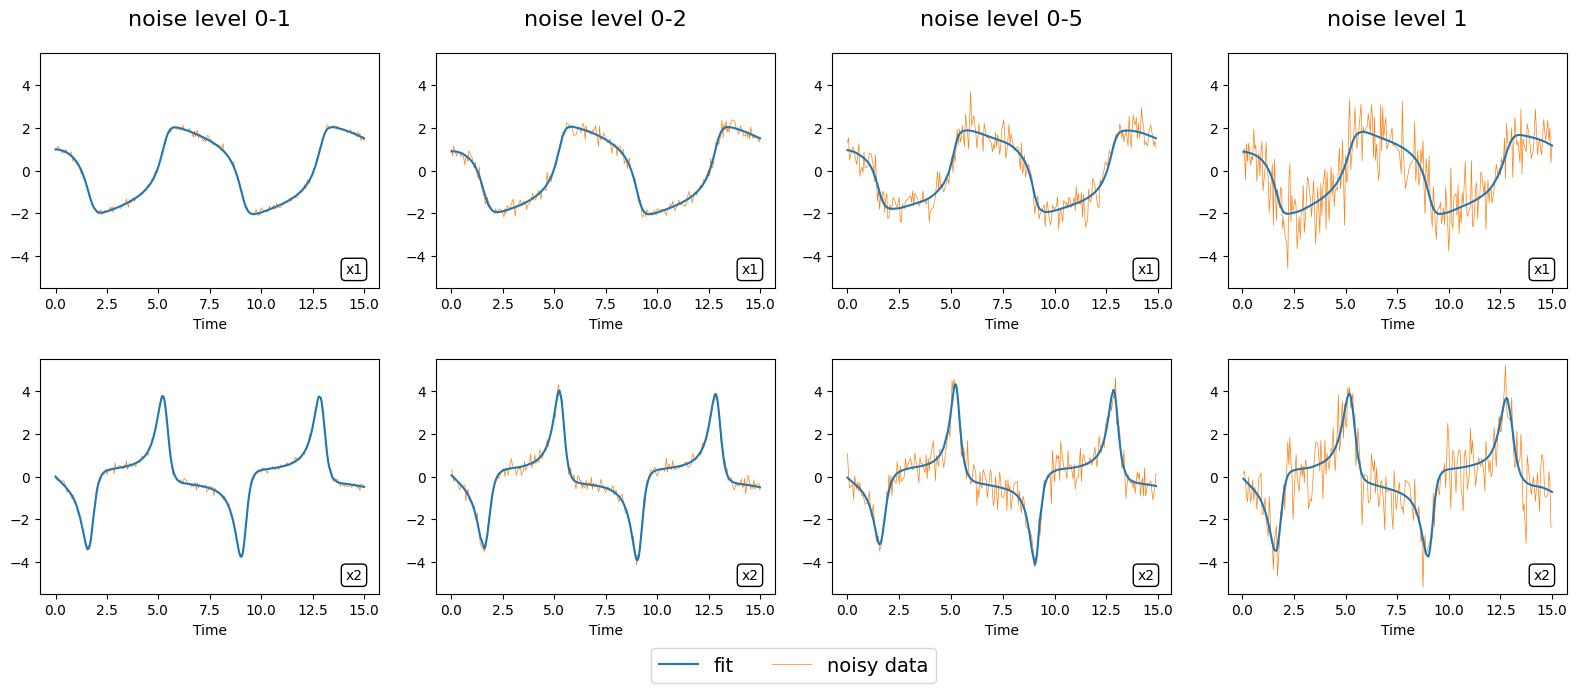

In [ ]:
# out_dir = out_dir_org # + "ALR/"
# # batch = "batch_10-05_3DLV_runth05"
batch = "batch_10-17_VanderPol"
additional_name = ""

for hl_number in [5]: # , 10
    for hl_size in [50]: #, 100
        for th in ["th0-01"]: # "0_1", "0_01", , "0-01"
            for int_order in [4]:

                # make plot
                n_col = 4
                n_row = n_taxa

                fig, axs = plt.subplots(n_row, n_col)
                fig.set_figwidth(4*n_col)
                fig.set_figheight(3*n_row)
                fig.tight_layout(w_pad=1.0, h_pad=3)

                for i, noise in enumerate(["0-1", "0-2", "0-5", "1"]):
                    spec = f'_{hl_number}_{hl_size}_{th}_int{int_order}'

                    run = "02"
                    plot_path_tmp = f"{out_dir}output_{batch}_run{run}_noise{noise}{spec}/Data/"
                    print(plot_path_tmp)
                    if os.path.exists(f"{plot_path_tmp}prediction_x1.csv"):
                        for taxon in np.arange(n_taxa):
                            # read data files
                            df_pred = pd.read_csv(f"{plot_path_tmp}prediction_x{taxon+1}.csv", header=[0])
                            df_data_train = pd.read_csv(f"{plot_path_tmp}data_train_x{taxon+1}.csv", header=[0])
                            # convert files to numpy array
                            data_train = np.array(df_data_train)
                            pred = np.array(df_pred)
                            # make plot
                            axs[taxon, i].plot(pred[:,1], pred[:,0], label = "fit")
                            axs[taxon, i].plot(data_train[:,1], data_train[:,0], label = "noisy data", linewidth=0.5, color = colors[1], zorder = -1)
                            axs[taxon, i].set_ylim([-5.5, 5.5])
                            axs[taxon, i].set_xlabel("Time")
                            axs[taxon, i].text(0.95, 0.05, f'x{taxon+1}', ha='right', va='bottom', transform=axs[taxon, i].transAxes, bbox=dict(boxstyle="round", ec="black", fc="white"))
      
                        # set column titles
                        axs[0, i].set_title(f"noise level {noise}", fontsize = 16, pad = 20)
                  

            # add one legend for all polts (in the lower center)
            handles, labels = axs[0,0].get_legend_handles_labels()
            fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.1),
                        fancybox=True, shadow=False, ncol = 4, fontsize = 14)

            plt.savefig(f'{plot_output}VdP_noise_fits_5_50.pdf', bbox_inches='tight', dpi = 300)